# Final Project - Adi Ozer 208884403




Music is a big part of my life.Therefore, I decided to use Spotify’s dataset. My research question is what are the factors that make a song popular? Are there any interactions between the different factors? For example: Are singers that release a lot of songs more popular?
My data contains 18 features of music details that are taken from a professional company (Spotify API service) that does this analysis daily. Therefore, I can trust this data and test my research questions by analyzing their data of millions of song’s features, such as: Tempo, Danceability, Acousticness, Energy, etc. 


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

Dataset Description- My dataset contains 18836 songs that are presented by the column “song_name” (string)and each song has 18 features like duration_ms, acousticness, danceability, energy, etc. 
We can see that the second column “song_popularity” (discrete variable, integers) is my predicted result that shows the songs ratings of Spotifys’ audience, by the analyze of other columns that contain the different features.                           The “song_duration_ms” (integers) column is the duration of the track in milliseconds.The “acousticness” (continuous variable, float) column is a confidence measure from 0.0 to 1.0 of whether the track is acoustic. As 1.0 represents the highest confidence that the track is acoustic and 0.0 is the lowest. The “danceability” (continuous variable, float) column describes how suitable a song is for dancing, based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. The “energy” (continuous variable, float) column is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Reasonably, energetic tracks feel fast and loud. For example, Rock has high energy, while Acoustic scores low on the scale. The “instrumentalness” (float) column predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The “key” (categorical by integers (-1) to 11) column is the estimated overall key of the track. Integers map to pitches using standard Pitch Class notation (Pitch classes are between (-1) to 11, For example: 0 = C or 2=D or -1 = no key was detected). The “liveness” (float) column detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. The “loudness” (float) column is the overall loudness of a track in decibels. Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. The “audio_mode” (integers) column is a binary value mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. The “speechiness” (float) column detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. The “tempo” (float) column is the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The “time_signature” (integers) coulmn is an estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The “audio_valence” (float) column is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). The “artist_name”, “album_names” and the “playlist” (type of song genre :Rock,Pop,Acoustic,etc.) are all strings that attribute to test more interactions that influence the popularity of a song.


In [98]:
####Reading files to data frames + printing the dataframes heads####
first_file = 'song_data.csv' 
second_file = 'song_info.csv'
df1 = pd.read_csv(first_file)
df2 = pd.read_csv(second_file)
####marging data sets####
full_data_frame=pd.merge(df1, df2,on='song_name',how='inner')
#####delete duplicated songs#####
full_data_frame=full_data_frame.drop_duplicates(subset ="song_name")
####presenting the head and the shape of the dataset####
print("The shape of the dataset is :",full_data_frame.shape)
full_data_frame.head()


The shape of the dataset is : (13070, 18)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
4,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,Hybrid Theory,00s Rock Anthems
5,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,Elephant,00s Rock Anthems
41,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
42,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback,Silver Side Up,00s Rock Anthems


After playing with my data and coping with data issues, I have 13070 rows of songs, and 18 columns that represent the different features. The song_name column are a string that tell us the name of the song. The second column "song_popularity", is my goal varies in integers, my predicted result that shows the songs ratings of Spotifys’ audience, by the analyze of other columns that contain the different features. The features are: song_duration_ms, key, audio_mode, time_signature- integers, acousticness, danceability, energy, insturmentalness, liveness, loudness, speechiness, tempo, audio_valence - float, artist_name, album_names, playlist- strings.

33 Drake
20 Eminem
20 Gucci Mane
33 Kanye West
41 Lady Gaga


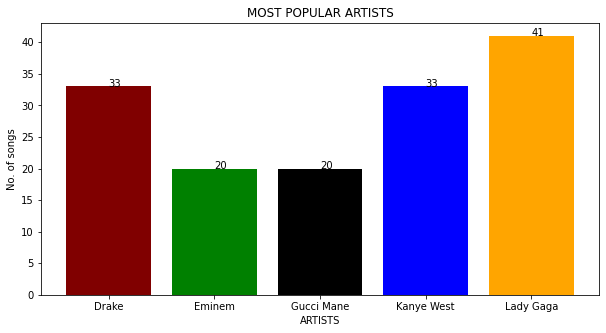

In [99]:
###### Analayzing Raw Data #####
####Using dictionary data type to store the number of songs per ARTIST####
num_songs_artist = dict(full_data_frame.groupby(['artist_name']).size())
####using loop to withdrew artists with less than 30 songs####
popular_artists = dict()
for artist,songs in num_songs_artist.items():
    if songs > 19:
        popular_artists[artist] = songs
columns_plot(popular_artists,"ARTISTS","No. of songs","MOST POPULAR ARTISTS",1)

In [100]:
def columns_plot(data,xlabel,ylabel,title,label_or_mean):
    lables = list(data.keys())
    values = list(data.values())
    c = ['maroon', 'green', 'black', 'blue', 'orange']
    fig = plt.figure(figsize = (10, 5))

    #### creating the bar plot ####
    plt.bar(lables, values, color = c, width = 0.8)
    if label_or_mean == 1:
        addlabels(data)
    elif label_or_mean == 0:
        mean = calculate_mean(data)
    ##    plt.axvline(mean, color='r', linestyle='solid', linewidth=3)
        plt.text(mean*1.7, max(values)*1,'Mean Popularity: {:.2f}'.format(mean),color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [101]:
#### Sub function writes the value of each banner in top five artists graph ####
def addlabels(data):
    x = list(data.keys())
    y = list(data.values())
    for i in range(len(x)):
        print(y[i],x[i])
        plt.text(i,y[i],y[i])

In [102]:
#### subfunction calculates the mean popularity on the data ####
def calculate_mean(data):
    sum_songs_popularity = 0
    sum_songs = 0
    for key,value in data.items():
        sum_songs_popularity = sum_songs_popularity + key*value
        sum_songs = sum_songs + value
    mean = sum_songs_popularity/sum_songs
    return int(mean)
    

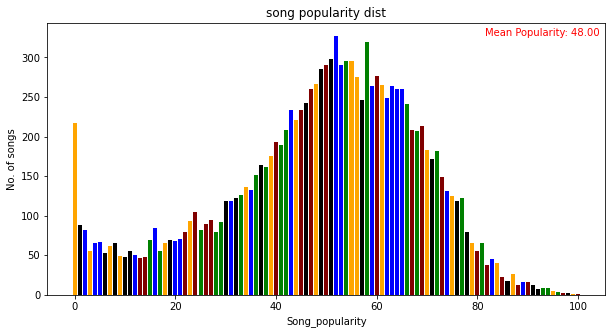

In [103]:
###### continuation of analayzing raw data ######
###### converting data to dictionary ######
popularity_dict = dict()
audio_mode_dict = dict()
for row in full_data_frame.iterrows():
    popularity = row[1]['song_popularity']
    if popularity in popularity_dict:
        popularity_dict[popularity] = popularity_dict[popularity]+1
    else:
        popularity_dict[popularity] = 1
    audio_mode = row[1]['audio_mode']
    if audio_mode in audio_mode_dict:
        audio_mode_dict[audio_mode] = audio_mode_dict[audio_mode]+1
    else:
        audio_mode_dict[audio_mode] = 1
columns_plot(popularity_dict,"Song_popularity","No. of songs","song popularity dist",0)

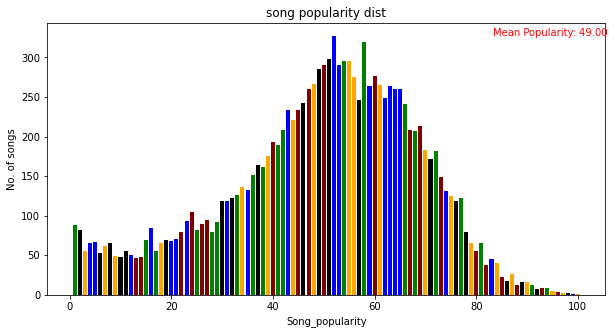

In [104]:
##### Handling Data issues by removing Zeros #####
full_data_frame = full_data_frame.loc[(full_data_frame["song_popularity"]  > 0)]
popularity_dict = dict()
audio_mode_dict = dict()
for row in full_data_frame.iterrows():
    popularity = row[1]['song_popularity']
    if popularity in popularity_dict:
        popularity_dict[popularity] = popularity_dict[popularity]+1
    else:
        popularity_dict[popularity] = 1
    audio_mode = row[1]['audio_mode']
    if audio_mode in audio_mode_dict:
        audio_mode_dict[audio_mode] = audio_mode_dict[audio_mode]+1
    else:
        audio_mode_dict[audio_mode] = 1
columns_plot(popularity_dict,"Song_popularity","No. of songs","song popularity dist",0)

In my data I had to deal with duplicate songs and other data related issues, I didn’t have any explicit missing data. First, I recognized that there are a lot of duplicated songs that appeared more than once. Therefore, I took out all the duplications. Second, after playing with my data I saw that my songs’ popularity distribution is close to normal and the proportion of songs who were valued zero in their popularity isn’t reasonable based on the distribution and the margins. Therefore, I assumed that these were missing values and decided to take them out since I couldn’t test my questions on them, and I had more than millions of songs to base my question on. Moreover, in case I had a feature that contains a lot of missing data and it wasn’t informative in any way that would help me analyze the data in favor of my research question, I should have deleted that feature. But, if that feature had even 15% data and the rest was missing, I would have coped with it by dividing my songs into categories of song types, calculating each song category’s average popularity. Afterwards, I could insert the average popularity to every missing data song based on the category it belongs to. 

<AxesSubplot:xlabel='energy', ylabel='tempo'>

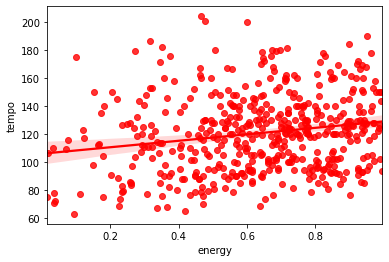

In [105]:
### used the function regplot to make a scatterplot ###
### I wanted to take 500 random points of data 
df = full_data_frame.sample(500)
### checking correlation between dancability and energy ### 
sns.regplot(x=df["energy"],y=df["tempo"],fit_reg=True ,color ='r')

<AxesSubplot:xlabel='acousticness', ylabel='tempo'>

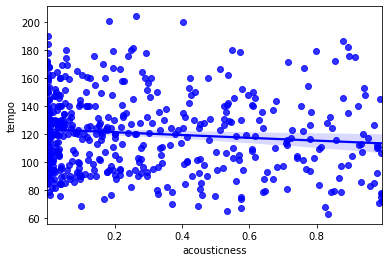

In [106]:
### checking correlation between acousticness and tempo ###
sns.regplot(x=df["acousticness"],y=df["tempo"],fit_reg=True ,color ='b')

<AxesSubplot:xlabel='liveness', ylabel='tempo'>

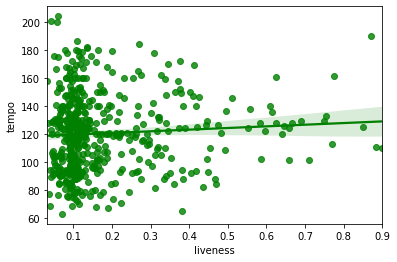

In [107]:
### checking correlation between liveness and tempo ###
sns.regplot(x=df["liveness"],y=df["tempo"],fit_reg=True ,color ='g')

<AxesSubplot:xlabel='danceability', ylabel='tempo'>

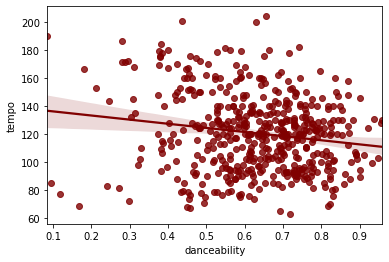

In [108]:
### checking correlation between danceability and tempo ###
sns.regplot(x=df["danceability"],y=df["tempo"],fit_reg=True ,color ='maroon')

<AxesSubplot:xlabel='energy', ylabel='danceability'>

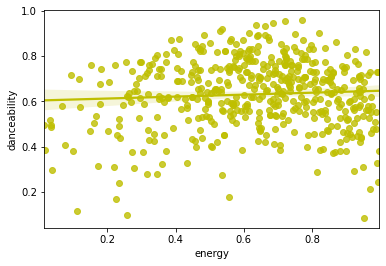

In [109]:
### checking correlation between energy and danceability ###
sns.regplot(x=df["energy"],y=df["danceability"],fit_reg=True ,color ='y')

Some data exploration in order to understand the different features and their influence on making a song popular, we checked correlations between different features.

In [110]:
full_data_frame.sort_values('tempo').head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,album_names,playlist
40137,Aura,50,102536,0.0774,0.000,0.560,0.963,11,0.5890,-9.866,1,0.000,0.000,0,0.0000,JFilt,Knodville,Lush Lofi
46398,...Familiar Place,62,175777,0.0128,0.214,0.148,0.058,7,0.1130,-17.775,1,0.037,46.591,4,0.0277,Lucy Dacus,No Burden,Your Favorite Coffeehouse
44476,Not Part of the Broken Hearts Club,46,147373,0.9190,0.710,0.114,0.000,4,0.1540,-12.764,0,0.269,47.953,4,0.4330,Mimi,I Will Be Okay,Sad Vibe
28185,Enter,52,230000,0.8080,0.146,0.126,0.949,2,0.3270,-22.702,1,0.040,51.607,4,0.0356,Milo Heart,Enter,Cool Down
42690,Vasoonak,11,272506,0.2750,0.548,0.493,0.000,10,0.0634,-12.743,1,0.176,52.181,4,0.6340,Shahla Sarshar,Ghiyamat,Persian Essentials


In [111]:
##### Is the song popualrity affected by the number of songs that artists have ####
##### creating class #####
class ModelData:
    def __init__(self, dataset):
        self.artist_popularity = list()
        self.tempo = dict()
        self.energy = dict()
        self.super_tempo_energ = dict()##### a new feature that is a combination of tempo and energy #####
        self.songs_popularity = dict()##### represention for all features of the song popularity after extracting and sorting data ####
##### initiation of the new features each one is assembled only from selected data and target data (song popularity)#####
        for row in dataset.iterrows():
            self.artist_popularity.append([row[1]['artist_name'],row[1]['song_name'],row[1]['song_popularity']])
            
            self.tempo[row[1]['tempo']] = row[1]['song_popularity']
            
            self.energy[row[1]['energy']] = row[1]['song_popularity']
            
            temp = row[1]['energy']*0.5 + row[1]['tempo']*0.5
            
            self.super_tempo_energ[temp] = row[1]['song_popularity']
#### after initiation each feature sent to a function that sorts and removes unneccecery data and plots the histogram ####
        self.songs_popularity = tempo_popularity(self)
        columns_plot_2(self,"Tempo_popularity","No. of songs","TOP 800 tempo")
        self.songs_popularity = Top_five_artists(self)
        columns_plot_2(self,"Song_popularity","No. of songs","TOP FIVE ARTIST DISTRIBUTION")
        self.songs_popularity = energy_popularity(self)
        columns_plot_2(self,"energy_popularity","No. of songs","TOP 800 energy")
        self.songs_popularity = super_tempo_energ(self)
        columns_plot_2(self,"super_tempo_energy popularity","No. of songs","TOP 800 super")

In [112]:
    #### sorting tempo and exctracting the top 800 songs with highest tempo #####
    def tempo_popularity(self):
        self.super_tempo_energ = collections.OrderedDict(sorted(self.super_tempo_energ.items(),reverse=True))
        i = 0
        tempo_popularity = dict()
        for key,val in self.tempo.items():
            i = i + 1
            if i > 800:
                break
            else:
                if val in tempo_popularity:
                    tempo_popularity[val] = tempo_popularity[val] + 1
                else:
                    tempo_popularity[val] = 1
        return tempo_popularity

In [113]:
    #### sorting energy and exctracting the top 800 songs with highest energy #####
    def energy_popularity(self):
        ##self.tempo = collections.OrderedDict(sorted(self.tempo.items(),reverse=True))
        self.energy = collections.OrderedDict(sorted(self.energy.items(),reverse=True))
        i = 0
        energy_popularity = dict()
        for key,val in self.energy.items():
            i = i + 1
            if i > 800:
                break
            else:
                if val in energy_popularity:
                    energy_popularity[val] = energy_popularity[val] + 1
                else:
                    energy_popularity[val] = 1
        return energy_popularity

In [114]:
    #### sorting combination of energy and tempo and exctracting the top 800 songs with highest result #####
    def super_tempo_energ(self):
        self.super_tempo_energ = collections.OrderedDict(sorted(self.super_tempo_energ.items(),reverse=True))
        i = 0
        super_tempo_energ_popularity = dict()
        for key,val in self.super_tempo_energ.items():
            i = i + 1
            if i > 800:
                break
            else:
                if val in super_tempo_energ_popularity:
                    super_tempo_energ_popularity[val] = super_tempo_energ_popularity[val] + 1
                else:
                    super_tempo_energ_popularity[val] = 1
        return super_tempo_energ_popularity

In [115]:
    #### exctracting the top five artists popularity from data #####
    def Top_five_artists(self):
        dict_song_popular_artists = dict()
        artist_list = ["Lady Gaga","Kanye West","Gucci Mane","Eminem","Drake"]
        for song in self.artist_popularity:
            if song[0] in artist_list:
                    if song[2] in dict_song_popular_artists:
                        dict_song_popular_artists[song[2]] = dict_song_popular_artists[song[2]] + 1
                    else:
                        dict_song_popular_artists[song[2]] = 1
        return dict_song_popular_artists

In [116]:
    ###### the function creates an histogram of song popularity distribution for each feature #######
    def columns_plot_2(self,xlabel,ylabel,title,):
        lables = list(self.songs_popularity.keys())
        values = list(self.songs_popularity.values())
        c = ['maroon', 'green', 'black', 'blue', 'orange']
        fig = plt.figure(figsize = (10, 5))

        # creating the bar plot
        plt.bar(lables, values, color = c, width = 0.8)

        mean = calculate_mean_2(self)
        ##    plt.axvline(mean, color='r', linestyle='solid', linewidth=3)
        plt.text(mean*1.3, max(values)*1,'Mean Popularity: {:.2f}'.format(mean),color='red')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()

In [117]:
    ##### sub function calculating mean popularity #####
    def calculate_mean_2(self):
        sum_songs_popularity = 0
        sum_songs = 0
        for key,value in self.songs_popularity.items():
            sum_songs_popularity = sum_songs_popularity + key*value
            sum_songs = sum_songs + value
        mean = sum_songs_popularity/sum_songs
        return int(mean)
    

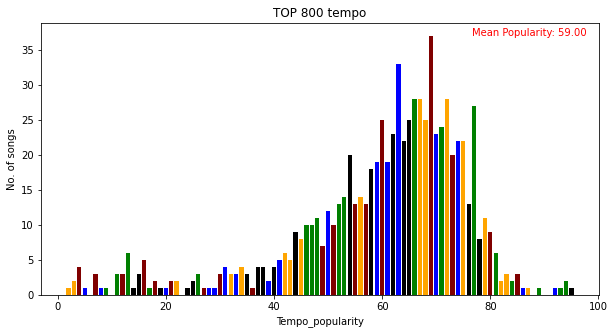

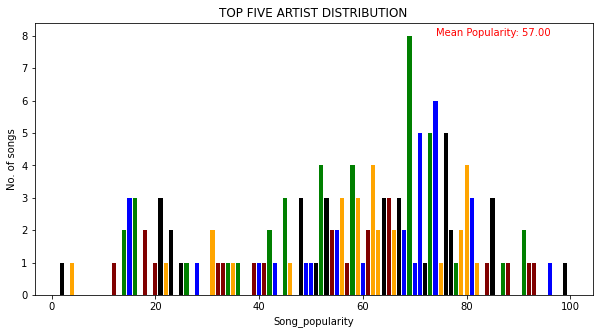

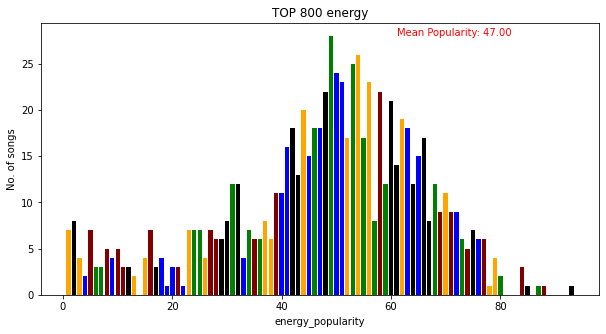

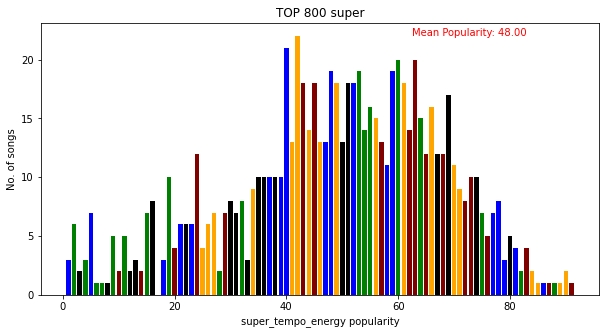

In [118]:
#### creating class and calling all the functions ####
ModelData(full_data_frame)


Looking at the grafs, If there was a positive correlation between tempo and energy, I would have expected to see that the combined feature super_tempo_energy would have the highest mean popularity in comparison to tempo and energy alone, or at least be higher than one of them. But we see that the top 800 songs in tempo have the highest mean popularity.